Topicos
1. Classificar contornos por área.
2. Classificar da esquerda para a direita (ótimo para OCR).
3. Aproximar contornos.
4. Envoltório convexo (convex hull).

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def imshow(image = None, size = 10):
    h, w = image.shape[0], image.shape[1]
    aspect_ratio = h/w
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

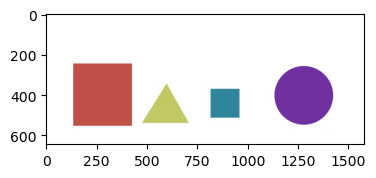

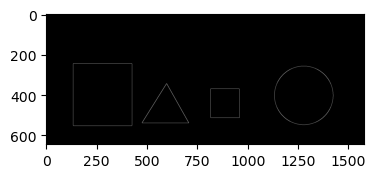

4


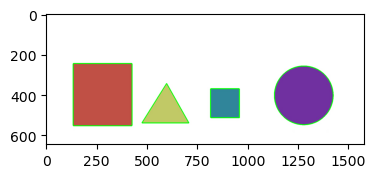

In [2]:

image = cv2.imread('images/bunchofshapes.jpg')
imshow(image)


gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 50, 200)
imshow(edged)

contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours))

cv2.drawContours(image, contours, -1, (0,255,0), 3)
imshow(image)

### Classificar contornos por área.

Original:
[20587.5, 22901.5, 66579.5, 90222.0]
Ordenado:
[90222.0, 66579.5, 22901.5, 20587.5]


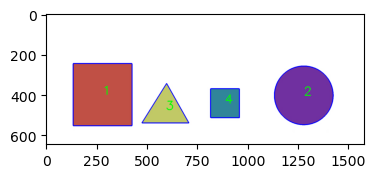

In [4]:

def get_contour_areas(contours):
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

image = cv2.imread('images/bunchofshapes.jpg')

print("Original:")
print(get_contour_areas(contours))

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

print("Ordenado:") 
print(get_contour_areas(sorted_contours))

for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.drawContours(image, [c], -1, (255,0,0), 3)

imshow(image)

## Classificar da esquerda para a direita

In [5]:

def x_cord_contour(contours):
    """Retorna a coordenada X do centróide do contorno."""
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass
    
def label_contour_center(image, c):
    """Coloca um círculo vermelho nos centros dos contornos."""
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)
    return image

#### **Usamos Moments para calcular o centro e, em seguida, usamos a coordenada X para classificar da esquerda para a direita**

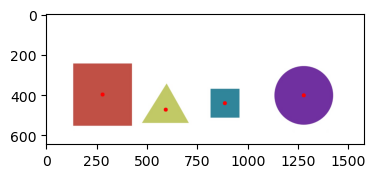

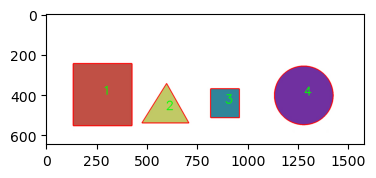

In [6]:

image = cv2.imread('images/bunchofshapes.jpg')
orginal_image = image.copy()

for (i, c) in enumerate(contours):
    orig = label_contour_center(image, c)
 
imshow(image)

contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)

for (i,c)  in enumerate(contours_left_to_right):
    cv2.drawContours(orginal_image, [c], -1, (0,0,255), 3)  
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(orginal_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    (x, y, w, h) = cv2.boundingRect(c)  

imshow(orginal_image)

## **Aproximando Contornos usando ApproxPolyDP**

### **Usando ApproxPolyDP para aproximar contornos como uma forma mais definida**
Ele aproxima uma forma de contorno para outra forma com menos vértices, dependendo da precisão que especificamos.


***cv2.approxPolyDP(contorno, Precisão de Aproximação, Fechado)***
- **contorno** - é o contorno individual que desejamos aproximar
- **Precisão de Aproximação** - Parâmetro importante para determinar a precisão da aproximação. Valores pequenos fornecem aproximações precisas, valores grandes fornecem aproximações mais genéricas. Uma boa regra é usar menos de 5% do perímetro do contorno.
- **Fechado** - um valor booleano que indica se o contorno aproximado deve ser aberto ou fechado.

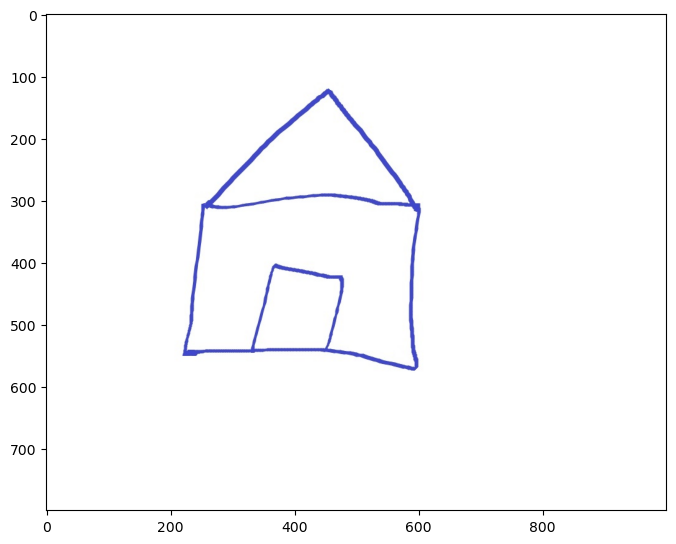

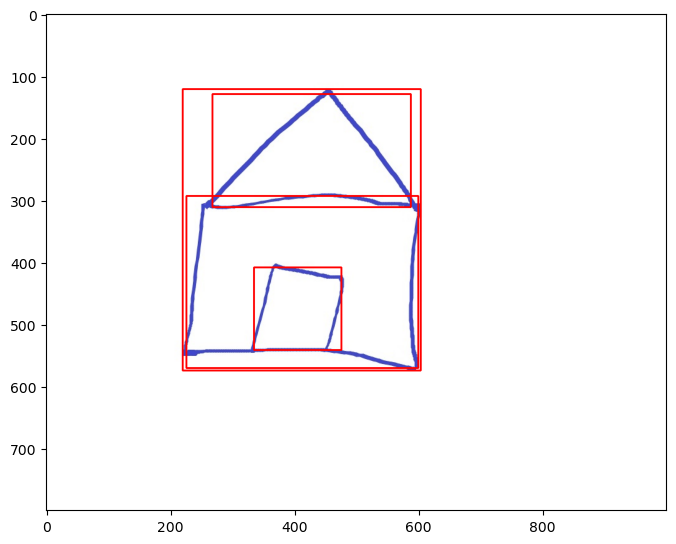

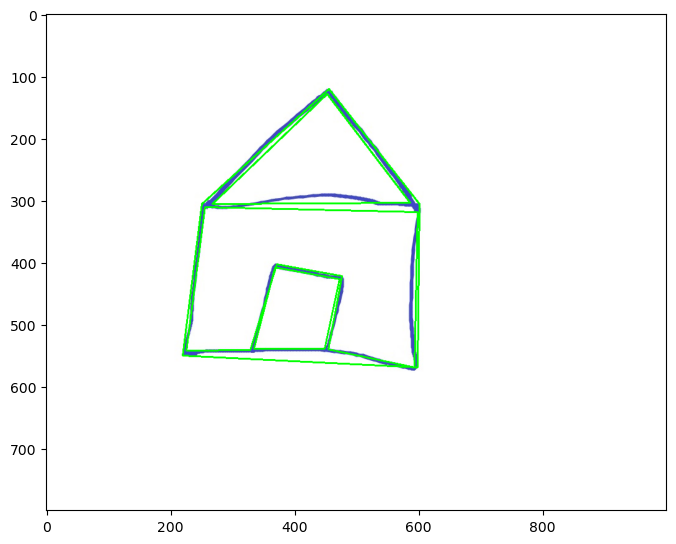

In [8]:

image = cv2.imread('images/house.jpg')
orig_image = image.copy()
imshow(orig_image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
copy = image.copy()

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)
    cv2.drawContours(image, [c], 0, (0, 255, 0), 2)

imshow(orig_image)

for c in contours:
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(copy, [approx], 0, (0, 255, 0), 2)

imshow(copy)

## **Convex Hull**

![](images/convex.png)


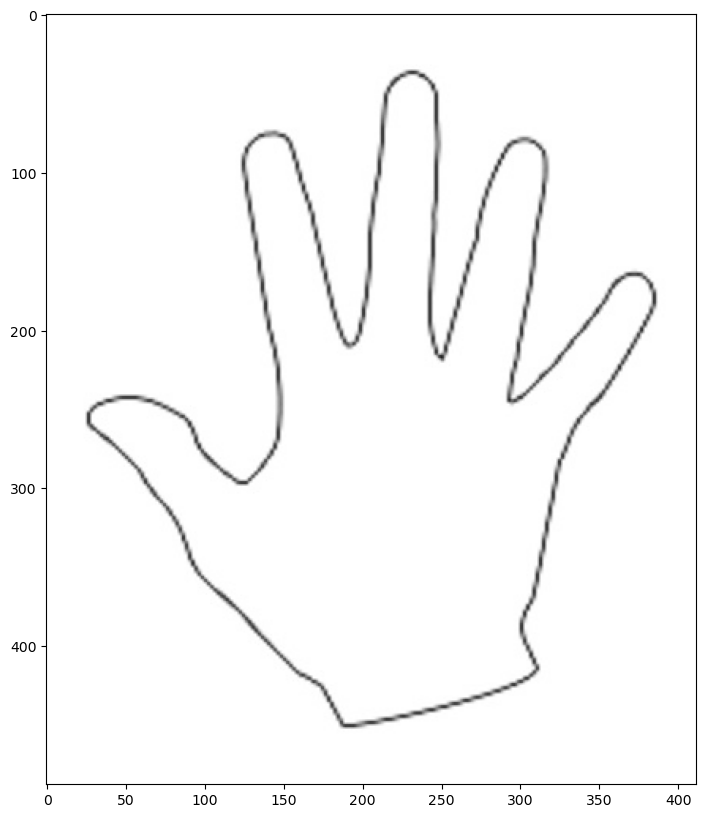

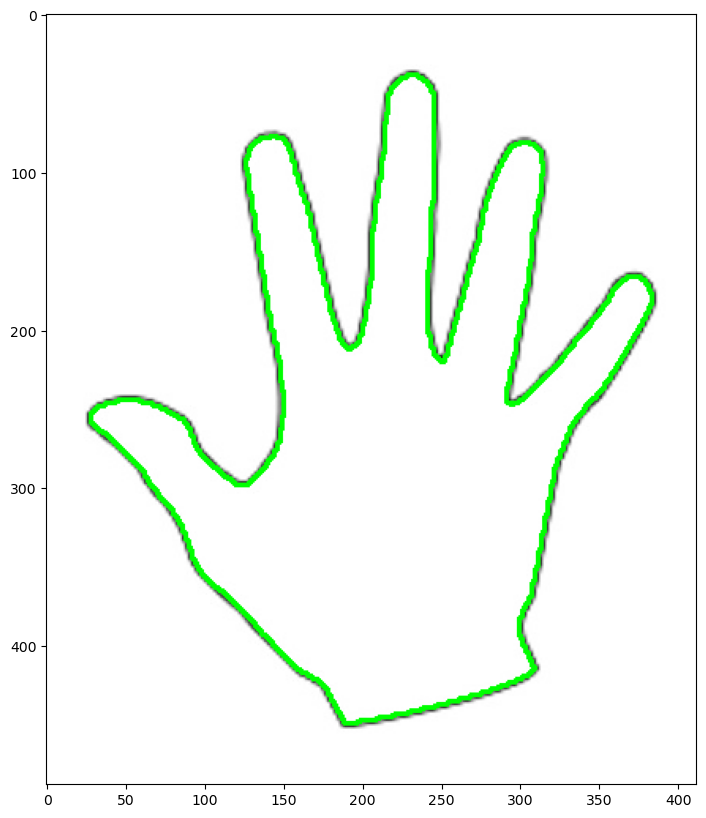

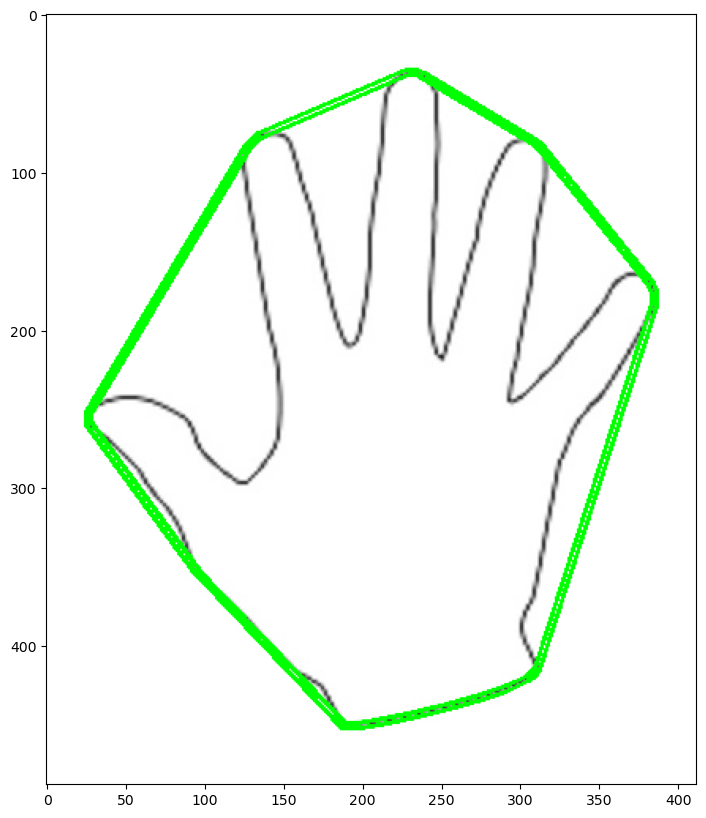

In [9]:


image = cv2.imread('images/hand.jpg')
orginal_image = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imshow(gray)

ret, thresh = cv2.threshold(gray, 176, 255, 0)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, contours, 0, (0, 255, 0), 2)

imshow(image)


# Classifica os contornos por área e depois remova o maior contorno de quadro.
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Itera pelos contornos e desenha o envoltório convexo.
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(orginal_image, [hull], 0, (0, 255, 0), 2)
    
imshow(orginal_image)